# Word Embeddings 📊

In [5]:
import numpy as np
from gensim.models import Word2Vec

# Sample corpus for embedding training
corpus = [
    "Natural language processing enables computers to understand human language.",
    "Word embeddings capture semantic relationships between words.",
    "Neural networks are used for training word embeddings.",
    "The skip-gram model predicts context words for a target word.",
    "Deep learning is a subset of machine learning focused on neural networks.",
    "Computers and networks play a crucial role in technology.",
    "Artificial intelligence is transforming industries worldwide.",
    "Machine learning algorithms analyze patterns in data.",
    "Men and women work together to solve complex problems.",
    "Gender diversity in tech leads to more innovative solutions.",
    "The king ruled the kingdom with wisdom and fairness.",
    "The queen and king were respected by all their subjects.",
    "A man and a woman walked through the park discussing various topics.",
    "The king's decisions were influenced by his wise advisors.",
    "The woman discovered a new method to improve agricultural yield."
]

# Display the sample corpus
print("Sample Corpus:\n", corpus)

Sample Corpus:
 ['Natural language processing enables computers to understand human language.', 'Word embeddings capture semantic relationships between words.', 'Neural networks are used for training word embeddings.', 'The skip-gram model predicts context words for a target word.', 'Deep learning is a subset of machine learning focused on neural networks.', 'Computers and networks play a crucial role in technology.', 'Artificial intelligence is transforming industries worldwide.', 'Machine learning algorithms analyze patterns in data.', 'Men and women work together to solve complex problems.', 'Gender diversity in tech leads to more innovative solutions.', 'The king ruled the kingdom with wisdom and fairness.', 'The queen and king were respected by all their subjects.', 'A man and a woman walked through the park discussing various topics.', "The king's decisions were influenced by his wise advisors.", 'The woman discovered a new method to improve agricultural yield.']


## 1. Word2Vec Embeddings 🧠
Word2Vec is a popular algorithm for generating dense vector representations of words. It is an unsupervised learning algorithm developed by Google in 2013. The algorithm is based on the distributional hypothesis, which states that words that appear in the same contexts share semantic meaning.

In [6]:
# Preprocess the text corpus
def preprocess_text(corpus):
    """Tokenize and preprocess the text corpus."""
    return [sentence.lower().split() for sentence in corpus]

# Tokenized corpus
tokenized_corpus = preprocess_text(corpus)

# Train Word2Vec model
word2vec_model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100, # Dimensionality of the word vectors
    window=5,
    min_count=1,
    workers=4,
    sg=1  # Use skip-gram model
)

# Access word vectors
word_vector = word2vec_model.wv['language']
print("Word Vector for 'language':\n", word_vector)

Word Vector for 'language':
 [-1.5247356e-03 -3.9764708e-03 -4.3979748e-03 -4.6196165e-03
 -5.5823163e-03 -5.2989577e-03 -7.9926038e-03  9.5741767e-03
  6.3676559e-03 -3.6287741e-03  2.4477327e-03 -7.6823733e-03
  7.5433562e-03  8.3056428e-03  8.3012128e-04 -6.8711424e-03
 -2.9669150e-03  4.7157197e-03 -2.9314330e-03  3.1045815e-03
  9.4032064e-03  4.3587447e-03 -5.1381830e-03  5.4442603e-03
 -2.9137610e-03 -6.4089014e-03  6.9694696e-03 -9.2867026e-03
 -1.1624940e-03 -1.3683396e-03 -8.4004020e-03 -1.1279181e-03
  5.6207660e-03 -5.3432728e-03 -7.0621041e-03  6.2738284e-03
 -3.4323351e-03 -7.8322571e-03  3.0271843e-04 -1.1590161e-04
  7.5225239e-03  5.3893117e-04  7.8665717e-03 -9.8002655e-03
  4.0963045e-03  6.2482790e-03  1.0183688e-03 -2.8408428e-03
  1.0669166e-03 -8.3141640e-04 -8.0887983e-03 -6.8079657e-03
  1.2106601e-03 -1.9902973e-03  9.5211007e-03 -9.6169004e-04
  6.1404984e-03  2.0506894e-03  8.0599189e-03 -9.2986673e-03
  2.4017938e-03 -1.4466534e-03  2.1595941e-03 -2.1563438

## 2. GloVe Embeddings 🌍
GloVe (Global Vectors for Word Representation) is another popular algorithm for generating word embeddings. It is based on matrix factorization techniques on the word-word co-occurrence matrix. GloVe embeddings are trained on aggregated global word-word co-occurrence statistics from a corpus.

In [3]:
# Download GloVe vectors (only need to do this once)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# Load pre-trained GloVe vectors
def load_glove_vectors(glove_file):
    """Load GloVe vectors from a file."""
    with open(glove_file, 'r', encoding='utf-8') as f:
        glove_vectors = {}
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_vectors[word] = vector
    return glove_vectors

# Load GloVe vectors (100-dimensional)
glove_vectors = load_glove_vectors('glove.6B.100d.txt')

# Access GloVe word vectors
glove_vector = glove_vectors['language']
print("GloVe Vector for 'language':\n", glove_vector)

--2024-08-09 20:53:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-08-09 20:53:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-08-09 20:53:29--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

## 3. Visualizing Word Embeddings with PCA 🖼️
Visualize word embeddings using dimensionality reduction techniques.

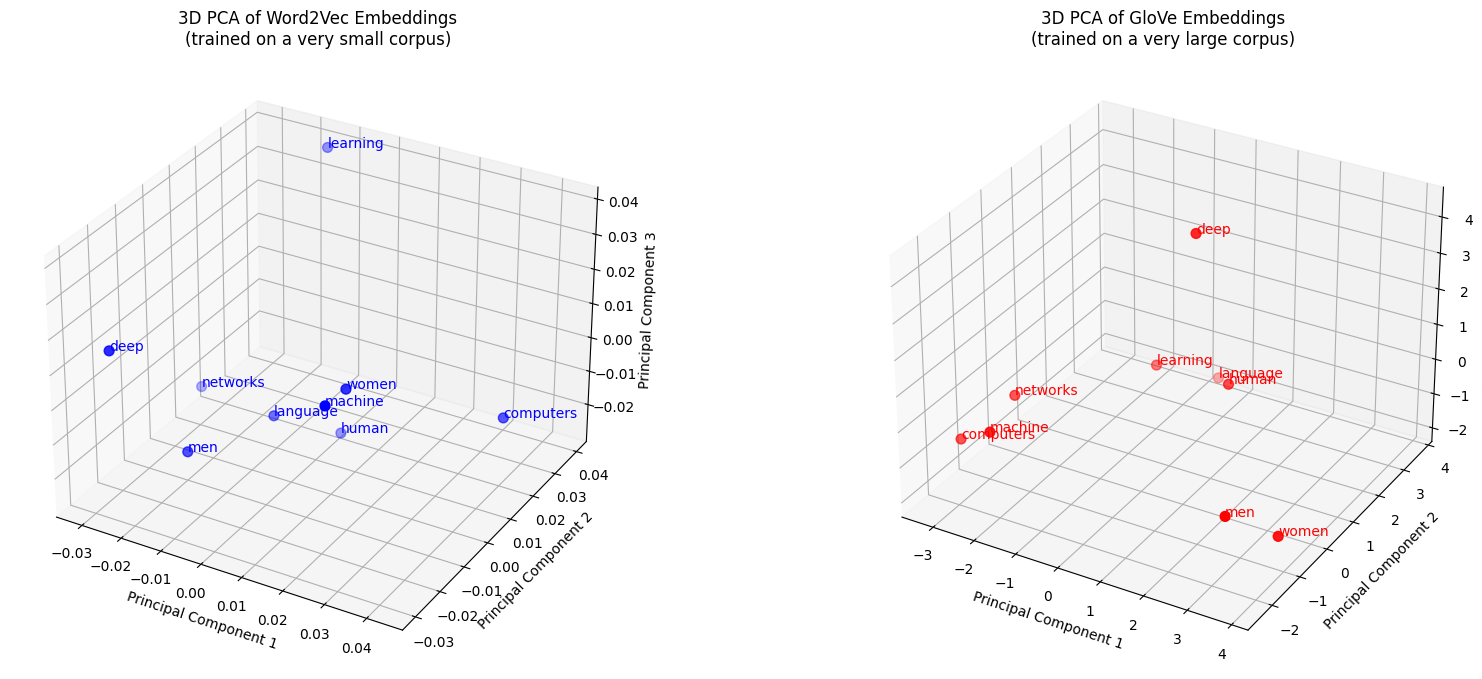

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = ['language', 'computers', 'human', 'networks', 'deep', 'learning', 'machine', 'women', 'men']

# Get Word2Vec vectors
word2vec_vectors = np.array([word2vec_model.wv[word] for word in words])

# Get GloVe vectors
glove_vectors_subset = np.array([glove_vectors[word] for word in words])

# Perform PCA for 3D visualization
pca_word2vec = PCA(n_components=3).fit_transform(word2vec_vectors)
pca_glove = PCA(n_components=3).fit_transform(glove_vectors_subset)

# Create two subplots
fig = plt.figure(figsize=(20, 8))

# Plot Word2Vec in 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(pca_word2vec[:, 0], pca_word2vec[:, 1], pca_word2vec[:, 2], c='blue', s=50, label='Word2Vec')
for i, word in enumerate(words):
    ax1.text(pca_word2vec[i, 0], pca_word2vec[i, 1], pca_word2vec[i, 2], word, color='blue')
ax1.set_title("3D PCA of Word2Vec Embeddings\n(trained on a very small corpus)")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.set_zlabel("Principal Component 3")

# Plot GloVe in 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(pca_glove[:, 0], pca_glove[:, 1], pca_glove[:, 2], c='red', s=50, label='GloVe')
for i, word in enumerate(words):
    ax2.text(pca_glove[i, 0], pca_glove[i, 1], pca_glove[i, 2], word, color='red')
ax2.set_title("3D PCA of GloVe Embeddings\n(trained on a very large corpus)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_zlabel("Principal Component 3")

plt.show()

**Plot Explanation**
These two 3D plots compare word embeddings from Word2Vec (left) and GloVe (right).

**Word2Vec**: Trained on a small corpus, this model's embeddings may not fully capture meaningful word relationships, resulting in less coherent clusters.

**GloVe**: Pre-trained on a massive corpus, this model produces more accurate and semantically meaningful embeddings, with similar words clustering together more clearly.

These plots highlight the impact of training data size on the quality of word embeddings, demonstrating why pre-trained models like GloVe are often preferred for capturing rich semantic relationships.

## 4. Analogy and Similarity Tasks 🔍

In [14]:
def word_analogy(model, word_a, word_b, word_c):
    """Perform word analogy task: a - b + c = ?"""
    try:
        analogy_result = model.wv.most_similar(positive=[word_c, word_a], negative=[word_b], topn=1)
        return analogy_result
    except KeyError:
        return "One or more words not in vocabulary."

def word_similarity(model, word1, word2):
    """Compute cosine similarity between two words."""
    try:
        return model.wv.similarity(word1, word2)
    except KeyError:
        return "One or both words not in vocabulary (not in training corpus)."

# GloVe analogy and similarity
def glove_word_analogy(glove_vectors, word_a, word_b, word_c):
    if word_a in glove_vectors and word_b in glove_vectors and word_c in glove_vectors:
        analogy_vector = glove_vectors[word_a] - glove_vectors[word_b] + glove_vectors[word_c]
        similarities = {word: np.dot(analogy_vector, vec) / (np.linalg.norm(analogy_vector) * np.linalg.norm(vec))
                        for word, vec in glove_vectors.items() if word not in {word_a, word_b, word_c}}
        return sorted(similarities.items(), key=lambda x: -x[1])[:1]
    else:
        return "One or more words not in vocabulary."

def glove_word_similarity(glove_vectors, word1, word2):
    if word1 in glove_vectors and word2 in glove_vectors:
        vec1, vec2 = glove_vectors[word1], glove_vectors[word2]
        return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    else:
        return "One or both words not in vocabulary."

# Word2Vec analogy and similarity
word2vec_analogy = word_analogy(word2vec_model, 'king', 'man', 'woman')
word2vec_similarity = word_similarity(word2vec_model, 'computer', 'human')

# GloVe analogy and similarity
glove_analogy = glove_word_analogy(glove_vectors, 'king', 'man', 'woman')
glove_similarity = glove_word_similarity(glove_vectors, 'computer', 'human')

# Print results
print("Word2Vec Analogy ('king' - 'man' + 'woman'):", word2vec_analogy)
print("Word2Vec Similarity ('computer' and 'human'):", word2vec_similarity)
print("\nGloVe Analogy ('king' - 'man' + 'woman'):", glove_analogy)
print("GloVe Similarity ('computer' and 'human'):", glove_similarity)

Word2Vec Analogy ('king' - 'man' + 'woman'): [('topics.', 0.2227436602115631)]
Word2Vec Similarity ('computer' and 'human'): One or both words not in vocabulary (not in training corpus).

GloVe Analogy ('king' - 'man' + 'woman'): [('queen', 0.7834413)]
GloVe Similarity ('computer' and 'human'): 0.39971665


## Conclusion
Word embeddings are crucial for capturing semantic relationships and improving the performance of NLP models. By training and visualizing embeddings, we gain insights into how words relate in a given context, providing a solid foundation for further NLP tasks.